In [1]:
%matplotlib notebook

In [2]:
# import all necessary packages and functions.
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the requied file
df_201402 = pd.read_csv('201402_station_data.csv')
result = df_201402.drop(df_201402.columns[[0,2,3]], axis=1)

# city stores the unique landmark names
cities = result.landmark.unique()
print (cities)

['San Jose' 'Redwood City' 'Mountain View' 'Palo Alto' 'San Francisco']


In [4]:
# Dictionary containing cities with corresponding number of docks and stations
no_of_docks,no_of_station = {},{}
for city in cities:
    land = result[result['landmark'].str.contains(city)]
    docks = land["dockcount"].sum()
    no_of_station[city] = len(land.index)
    no_of_docks[city] = docks

In [5]:
print('No. of Docks')
print(no_of_docks)
print ('No. of station')
print(no_of_station)

No. of Docks
{'Mountain View': 117, 'Palo Alto': 75, 'Redwood City': 115, 'San Francisco': 665, 'San Jose': 249}
No. of station
{'Mountain View': 7, 'Palo Alto': 5, 'Redwood City': 7, 'San Francisco': 35, 'San Jose': 15}


In [6]:
# sort for cities
sorted_names = sorted(no_of_docks, key=lambda x: no_of_docks[x])


In [7]:
# list of labels and values for pie chart
labels_dock,values_dock = [],[]
for key, value in no_of_docks.items():
    labels_dock.append(key)
    values_dock.append(value)

In [8]:
labels_station,values_station  = [],[]
for key, value in no_of_station.items():
    labels_station.append(key)
    values_station.append(value)

<IPython.core.display.Javascript object>


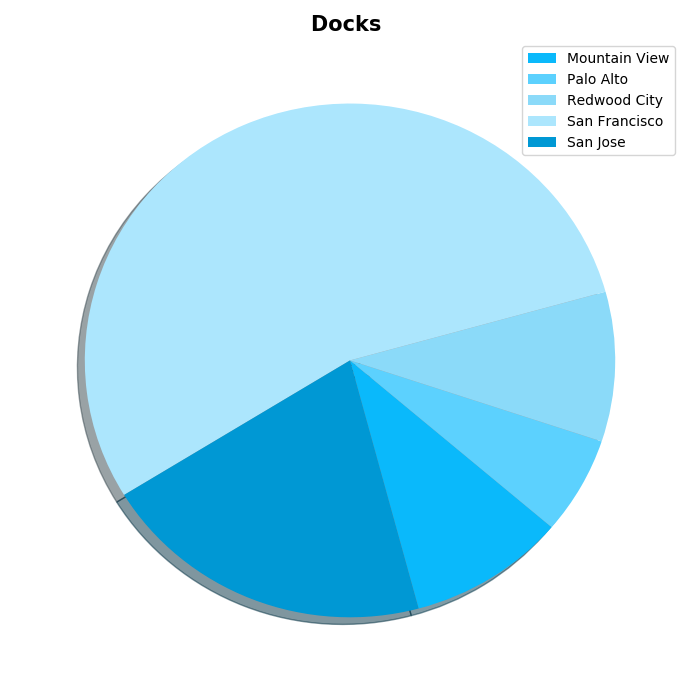

In [9]:
# Pie Chart to show the distribution of docks in different cities
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(7,7))
plt.title('Docks ', fontsize=15, fontweight='bold')
patches = plt.pie(values_dock, shadow = True,colors = colors, startangle = 285)
plt.legend(labels_dock, loc="best")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


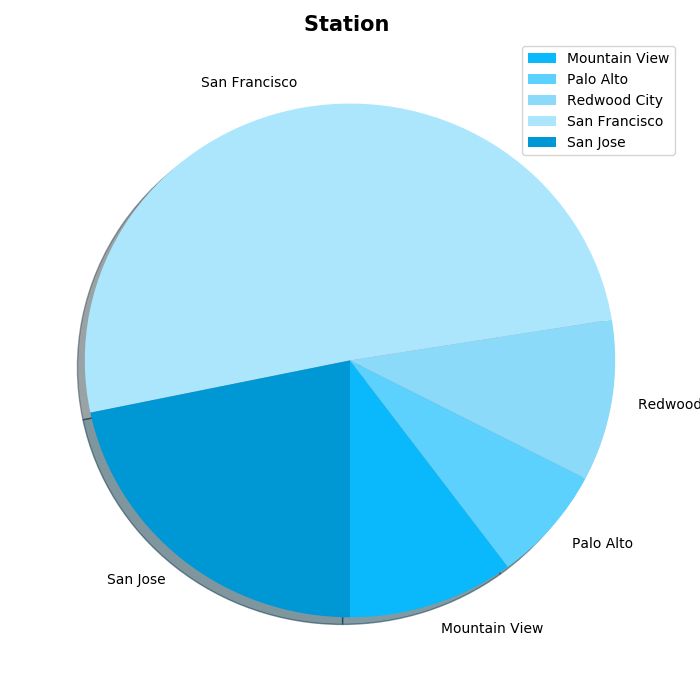

In [10]:
# Pie Chart to show the distribution of station in different cities
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(7,7))
plt.title('Station ', fontsize=15, fontweight='bold')
patches = plt.pie(values_station,labels =labels_station, shadow = True, colors = colors, startangle= 270)
plt.legend(labels_station, loc="best")
# View the plot
plt.tight_layout()
plt.show()

### Who uses the Bay Area Bike Share?

In [11]:
df_trip_201402 = pd.read_csv('201402_trip_data.csv', names=('TripID','Duration','Start_Date','Start_Station','Start_Terminal','End_Date','End_Station','End_Terminal','Bike','Subscription_Type','Zip_Code'), header = 0)

# city stores the unique landmark names
subscription = df_trip_201402.Subscription_Type.unique()

In [12]:
subscription_count = []
for i in subscription:
    sub = df_trip_201402[df_trip_201402['Subscription_Type'].str.contains(i)]
    subscription_count.append(len(sub.index))

print (subscription)
print (subscription_count)

['Subscriber' 'Customer']
[113647, 30368]


<IPython.core.display.Javascript object>


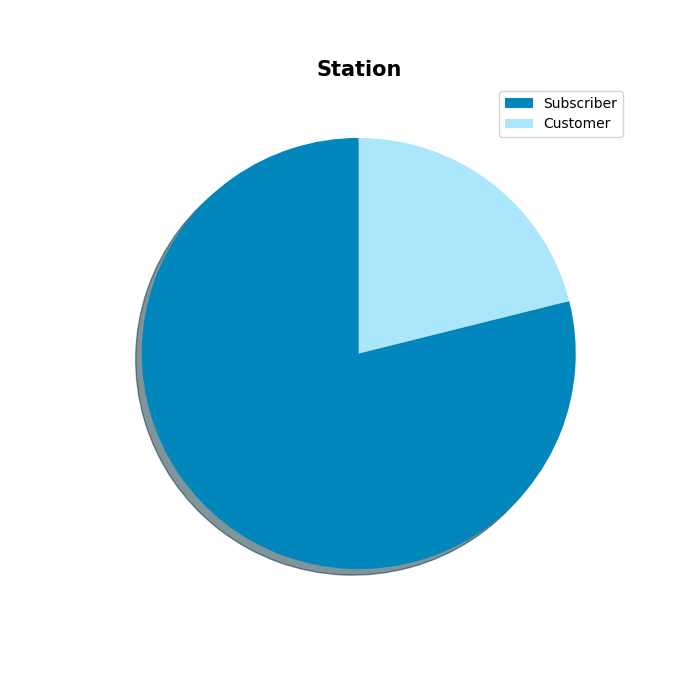

In [13]:
# Pie Chart to show the distribution of station in different cities
colors = ["#0287BC", "#ACE6FD"]
plt.figure(figsize=(7,7))
plt.title('Station', fontsize=15, fontweight='bold')
patches = plt.pie(subscription_count, shadow = True, colors = colors, startangle=90)
plt.legend(subscription, loc="best")
# View the plot
plt.show()

<IPython.core.display.Javascript object>


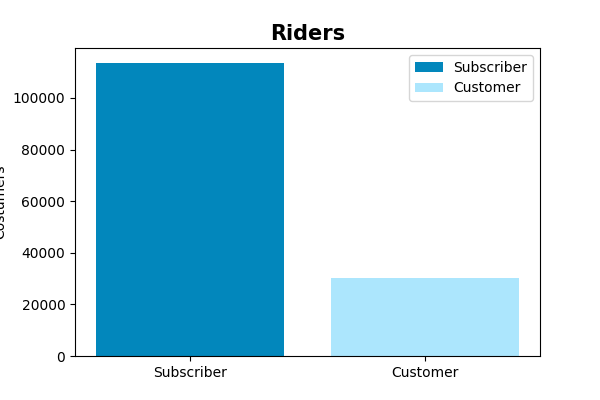

In [16]:
x_plot = np.arange(len(subscription_count))
plt.figure(figsize=(6,4))
patches = plt.bar([1,2], subscription_count, color=colors)
plt.title("Riders", fontsize = 15, fontweight = "bold")
plt.ylabel('Costumers')
plt.xticks(x_plot+1, subscription)
plt.legend(patches, subscription, loc="best")
plt.show()